In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the Test and Train Dataset
X_train = pd.read_csv("X_train_final.csv")
Y_train = pd.read_csv("Y_train.csv").iloc[:, 1]
X_test = pd.read_csv("X_test_final.csv")
Y_test = pd.read_csv("Y_test.csv").iloc[:, 1]

In [3]:
# GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform GridSearchCV
final_xgb_model = GridSearchCV(estimator=xgb_model, param_grid = xgb_param_grid, cv=3, scoring='roc_auc')
final_xgb_model.fit(X_train, Y_train)

# Best parameters and best score
print(f'Best parameters: {final_xgb_model.best_params_}')
print(f'Best AUC score: {final_xgb_model.best_score_}')


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 1.0}
Best AUC score: 0.9948076489817183


In [ ]:
y_pred = final_xgb_model.predict(X_test) # Prediction

In [23]:
# Function to print evaluation report
def evaluate_model(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')

In [ ]:
# Save the model
import joblib
joblib.dump(final_xgb_model, 'xgboost_model.pkl')

In [2]:
# Load the model
model = joblib.load('xgboost_model.pkl')

In [9]:
# Predict
y_pred = model.predict(X_test)

<Axes: >

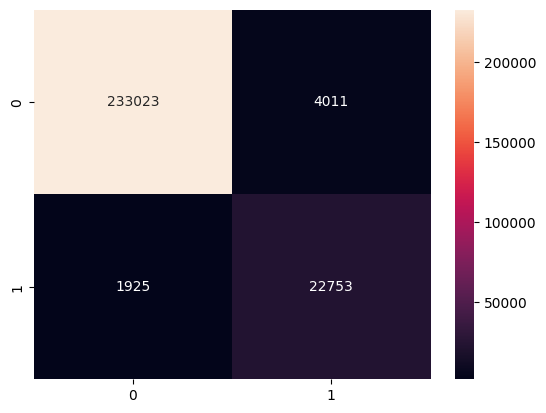

In [18]:
# Classification Report
sns.heatmap(confusion_matrix(Y_test, y_pred), annot = True, fmt = 'g')

In [25]:
# Evaluation Metrics
evaluate_model(Y_test, y_pred)

Accuracy: 0.9773
Precision: 0.8501
Recall: 0.9220
F1 Score: 0.8846
ROC AUC Score: 0.9525


In [27]:
fpr, tpr, t1 = roc_curve(Y_test, y_pred)

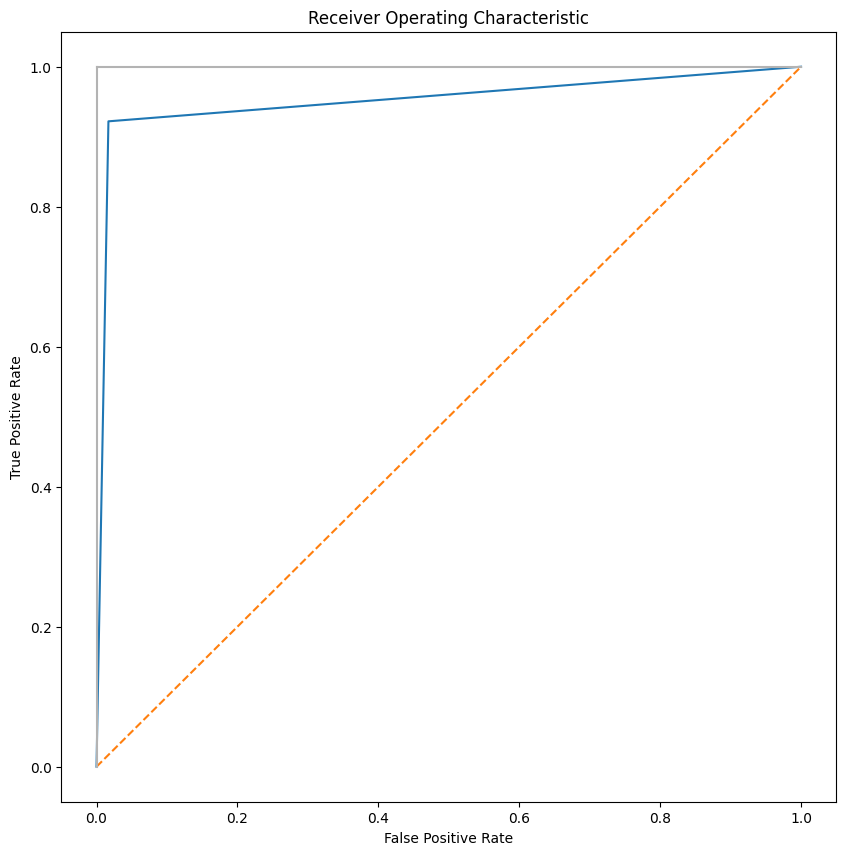

In [29]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()